In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import yfinance as yf

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

# Задание №1

Скачаем тикеры всех немецких компаний по [ссылке](https://investexcel.net/stocks-traded-german-exchanges/).

In [ ]:
companies = pd.read_excel("German Traded Companies.xlsx")
companies = list(companies['Ticker'])

In [ ]:
data = yf.download(companies,'2018-01-02','2018-12-31',threads=False)[['Close', 'Volume']]
indexes = yf.download(['^GDAXI'],'2018-01-02','2018-12-31')[['Close', 'Volume']]

In [ ]:
prices, volume = data['Close'], data['Volume']
prices = prices.reset_index()
indexes = indexes.reset_index()
volume = volume.reset_index()

to_delete = set(prices['Date'])-set(indexes['Date'])
for i in to_delete:
    prices = prices[prices['Date']!=i]
    volume = volume[volume['Date']!=i]

prices = prices.dropna(axis=1, how='any')
volume = volume.loc[:, prices.columns]

Сохраним данные.

In [ ]:
prices.to_csv('prices.csv')
volume.to_csv('volume.csv')
indexes.to_csv('indexes.csv')

# Чтение данных

In [6]:
prices = pd.read_csv('prices.csv')
volume = pd.read_csv('volume.csv')
indexes = pd.read_csv('indexes.csv')

prices.drop(columns=['Unnamed: 0'], inplace=True)
volume.drop(columns=['Unnamed: 0'], inplace=True)
indexes.drop(columns=['Unnamed: 0'], inplace=True)

Просмотрим загруженные данные.

In [7]:
prices

,Date,013A.BE,013A.MU,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02G.MU,...,ZWS.MU,ZYA.DU,ZYA.MU,ZYA.SG,ZYD.BE,ZYY.BE,ZZ7B.SG,ZZG.BE,ZZMS.BE,ZZMS.SG
0,2018-01-02,34.150002,34.459999,35.848000,6.525,49.599998,10.835,13.10,1.514285,1.472142,...,0.963,81.000000,80.680000,80.300003,10.12,55.980000,1.800110,3.38,12.30,12.519
1,2018-01-03,35.700001,36.400002,36.200001,6.900,49.400002,10.740,13.10,1.471428,1.485714,...,0.964,80.000000,79.449997,80.500000,10.10,56.400002,1.861839,3.32,12.40,12.500
2,2018-01-04,36.400002,36.400002,36.200001,6.950,50.500000,10.660,13.30,1.442857,1.457142,...,0.964,81.000000,80.000000,81.500000,10.10,56.200001,1.991272,3.34,12.40,12.700
3,2018-01-05,36.099998,36.400002,38.000000,6.800,52.000000,11.400,13.30,1.421428,1.442857,...,0.964,81.500000,80.500000,81.000000,10.10,57.000000,2.070923,3.40,12.60,12.300
4,2018-01-08,38.200001,38.099998,38.599998,6.800,52.000000,11.600,13.30,1.414285,1.392857,...,0.964,82.000000,81.000000,82.000000,9.98,56.200001,2.090835,3.40,12.40,12.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-19,18.610001,18.629999,17.990000,2.750,37.340000,5.460,13.69,0.832000,0.862000,...,1.110,54.080002,53.759998,53.970001,8.44,48.200001,1.120000,3.72,6.10,6.100
247,2018-12-20,17.500000,17.459999,17.459999,2.570,35.650002,5.240,13.84,0.841000,0.862000,...,1.110,51.790001,51.580002,52.889999,8.24,49.000000,1.170000,3.69,5.70,5.750
248,2018-12-21,17.719999,17.459999,17.309999,2.560,35.480000,5.510,13.52,0.857000,0.862000,...,1.110,52.540001,52.619999,53.380001,8.20,49.400002,1.050000,3.69,5.70,5.700
249,2018-12-27,18.459999,18.430000,18.590000,2.700,34.970001,5.880,14.04,0.848000,0.862000,...,1.110,54.000000,54.430000,53.770000,8.12,49.700001,0.866000,3.69,5.45,5.550


In [8]:
volume

,Date,013A.BE,013A.MU,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02G.MU,...,ZWS.MU,ZYA.DU,ZYA.MU,ZYA.SG,ZYD.BE,ZYY.BE,ZZ7B.SG,ZZG.BE,ZZMS.BE,ZZMS.SG
0,2018-01-02,80.0,46.0,628.0,0.0,0.0,0.0,0.0,7700.0,8209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,0.0,360.0,550.0,0.0,0.0,0.0,0.0,0.0,2660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,2018-01-04,80.0,95.0,560.0,0.0,0.0,0.0,0.0,1400.0,1610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,200.0,200.0,464.0,0.0,0.0,0.0,0.0,0.0,2100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-08,10.0,395.0,2001.0,0.0,0.0,0.0,0.0,0.0,9660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-19,150.0,300.0,610.0,0.0,0.0,0.0,0.0,1400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,2018-12-20,100.0,351.0,10760.0,0.0,0.0,680.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,2018-12-21,260.0,0.0,1211.0,0.0,0.0,190.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
249,2018-12-27,0.0,0.0,11307.0,0.0,0.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.0


In [9]:
indexes

,Date,Close,Volume
0,2018-01-02,12871.389648,86049300
1,2018-01-03,12978.209961,84809300
2,2018-01-04,13167.889648,101199400
3,2018-01-05,13319.639648,112555000
4,2018-01-08,13367.780273,95005300
...,...,...,...
246,2018-12-19,10766.209961,96506200
247,2018-12-20,10611.099609,122450600
248,2018-12-21,10633.820312,216162200
249,2018-12-27,10381.509766,104152600


# Задание №2

Вычисление логарифмических доходностей:

In [10]:
returns = {}
for i in prices.drop(columns=['Date']).columns:
    returns[i] = np.log(np.array(prices[i])[1:]/np.array(prices[i])[:-1])
returns = pd.DataFrame(returns)

Удалим акции, у которых содержание нулей в логарифмической доходности превышает 5%.

In [11]:
to_delete = []
for i in returns.columns:
    cur_dict = returns[i].value_counts()
    if 0 in cur_dict and cur_dict[0] > returns.shape[0] * 0.05:
        to_delete.append(i)
returns.drop(columns=to_delete, inplace=True)

Получили следующий набор данных:

In [12]:
returns

,013A.BE,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02M.BE,02M.MU,02M.SG,...,ZSV.BE,ZSV.DU,ZT1A.SG,ZVA.BE,ZVA.SG,ZVX.BE,ZVX.SG,ZYA.DU,ZYA.MU,ZYA.SG
0,0.044388,0.009771,0.055880,-0.004040,-0.008807,0.000000,-0.028710,0.013377,0.037058,0.006658,...,0.007149,0.006873,0.002987,0.016625,-0.007392,0.015851,0.032383,-0.012423,-0.015363,0.002488
1,0.019418,0.000000,0.007220,0.022023,-0.007477,0.015152,-0.019608,0.000000,0.000455,0.000000,...,-0.020762,-0.020762,0.023122,0.009844,0.052200,0.021733,-0.055525,0.012423,0.006899,0.012346
2,-0.008276,0.048527,-0.021819,0.029270,0.067115,0.000000,-0.014963,0.008969,0.009050,0.009050,...,-0.007018,-0.007018,0.022600,0.000816,-0.014185,-0.034065,-0.009602,0.006154,0.006231,-0.006154
3,0.056543,0.015666,0.000000,0.000000,0.017392,0.000000,-0.005038,-0.018018,0.017858,-0.009050,...,-0.007067,-0.014185,0.005571,0.077656,0.015748,-0.006342,-0.034351,0.006116,0.006192,0.012270
4,0.020726,0.002587,0.043172,0.009569,0.033902,0.007491,-0.020408,0.009050,-0.036040,-0.018349,...,0.000000,0.000000,0.021979,-0.008337,-0.011788,0.001177,0.058890,0.012121,0.012270,0.030032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.011752,-0.041911,0.063812,-0.022770,-0.010929,-0.034461,-0.007186,-0.002612,0.004549,-0.001497,...,0.020559,0.017409,-0.017458,0.002520,0.021411,0.045281,-0.008626,-0.033279,-0.041536,-0.016174
246,-0.061498,-0.029904,-0.067695,-0.046316,-0.041127,0.010897,0.010759,-0.070034,-0.032676,-0.069394,...,-0.030499,-0.034133,-0.081008,-0.056307,-0.125288,-0.033286,-0.017478,-0.043267,-0.041396,-0.020214
247,0.012493,-0.008628,-0.003899,-0.004780,0.050243,-0.023393,0.018846,0.011160,-0.025328,0.005604,...,0.043974,0.004948,0.003342,-0.048424,0.005634,0.011853,-0.003071,0.014378,0.019962,0.009222
248,0.040912,0.071339,0.053245,-0.014479,0.064992,0.037740,-0.010557,0.019624,0.024155,0.003586,...,-0.013475,0.006886,-0.014359,-0.013366,0.009783,-0.047480,-0.018235,0.027409,0.033819,0.007280


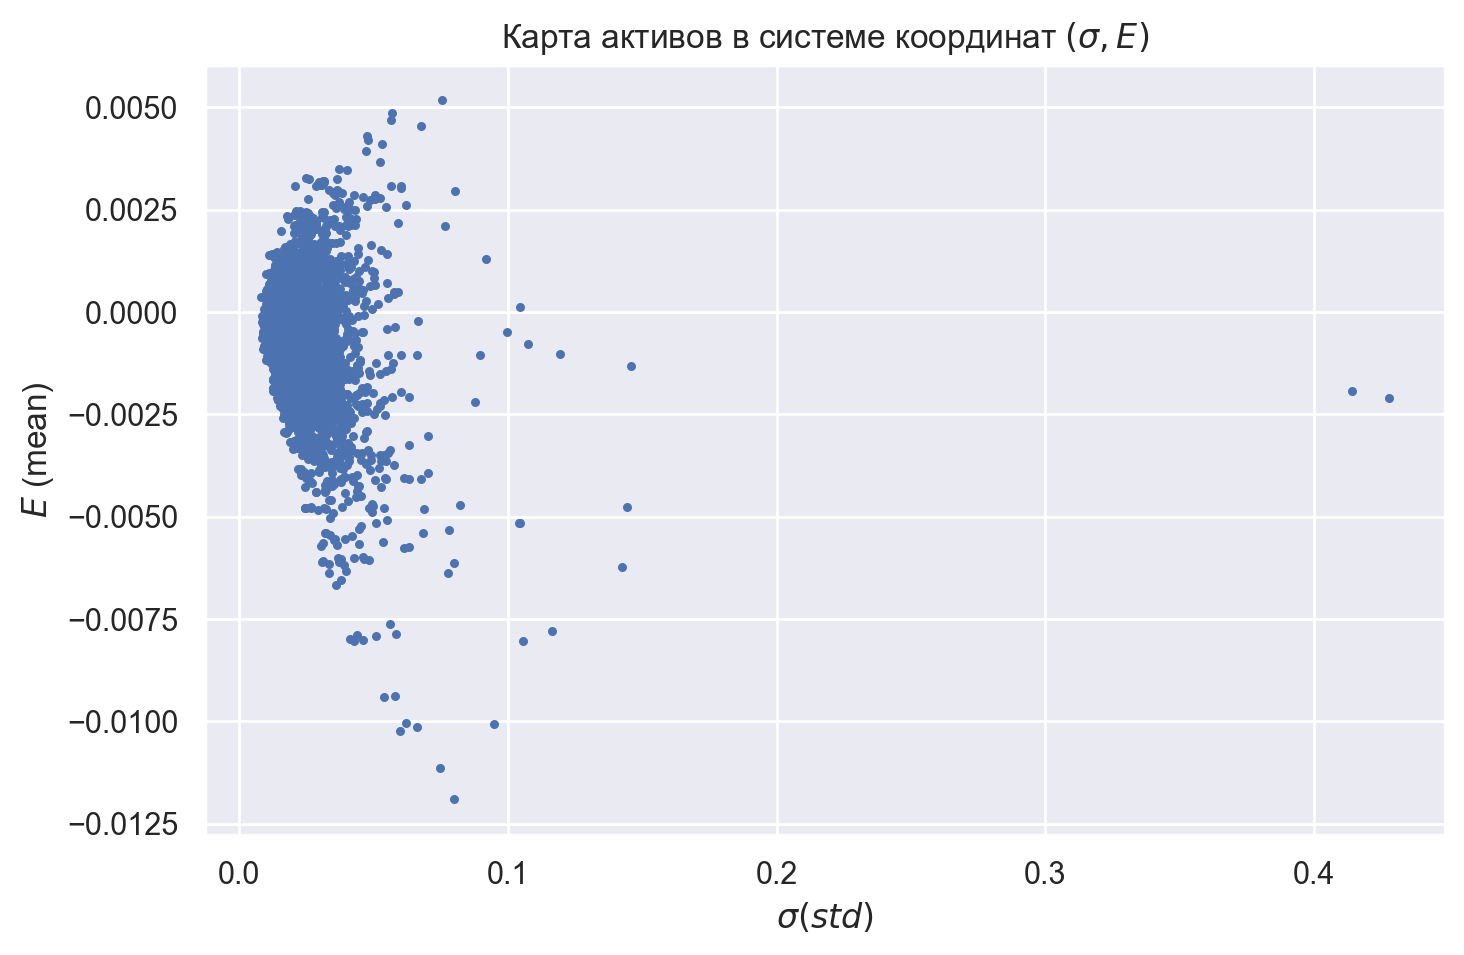

In [13]:
plt.scatter(returns.std(), returns.mean(), s=5)

plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание №3

In [14]:
equal_weights = returns.mean(axis=1)

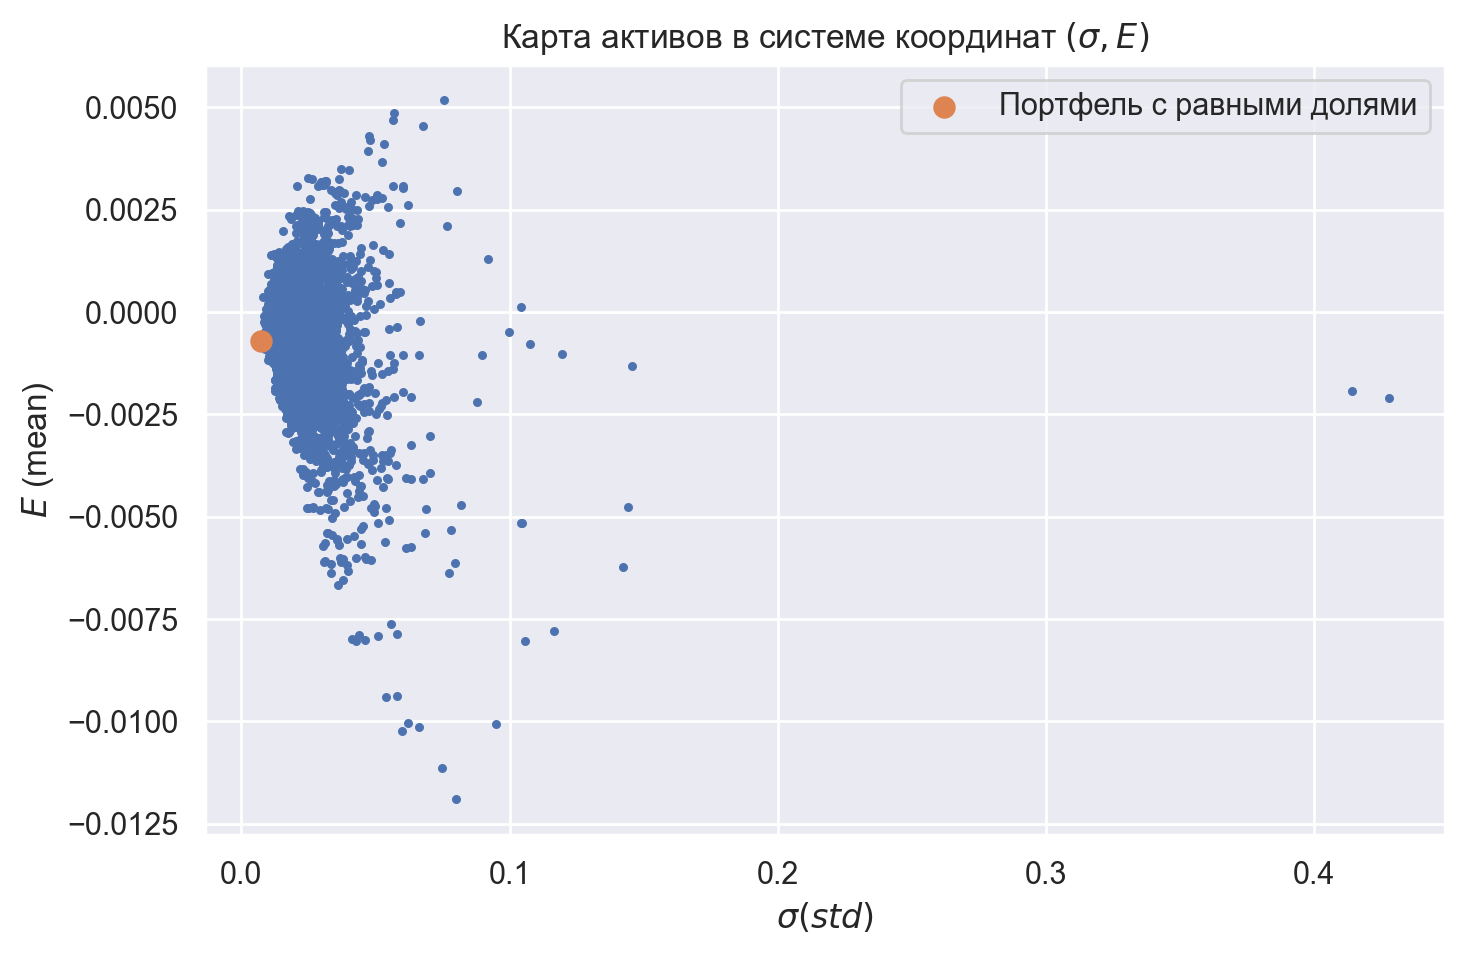

In [15]:
plt.scatter(returns.std(), returns.mean(), s=5)
plt.scatter([np.std(equal_weights)], [np.mean(equal_weights)], s=50, label='Портфель с равными долями')

plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание №4

Рассчитаем логарифмическую доходность для индекса рынка.

In [16]:
indexes_returns = np.log(np.array(indexes['Close'])[1:]/np.array(indexes['Close'])[:-1])

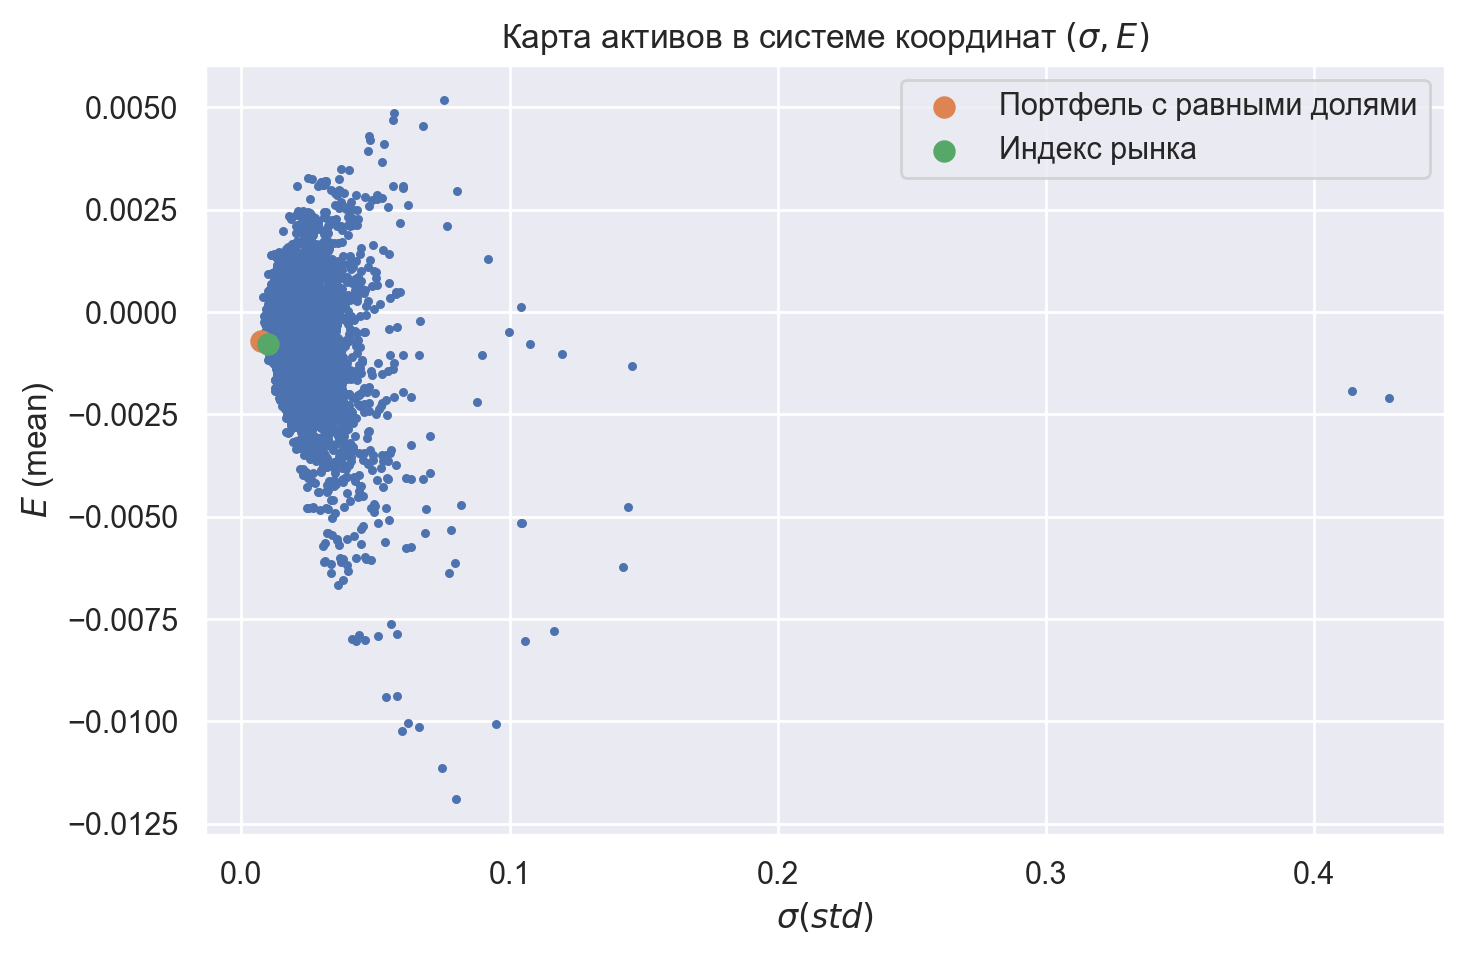

In [17]:
plt.scatter(returns.std(), returns.mean(), s=5)
plt.scatter([np.std(equal_weights)], [np.mean(equal_weights)], s=50, label='Портфель с равными долями')
plt.scatter([np.std(indexes_returns)], [np.mean(indexes_returns)], s=50, label='Индекс рынка')

plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание № 5

In [18]:
def calc_VaR(gamma):
    VaR = []
    for i in returns.columns:
        VaR.append({'Ticker': i, 'VaR': (-returns[i]).quantile(gamma)})
    VaR.sort(key=lambda x: x['VaR'])
    return VaR[0]

Лучший актив по VaR на уровене $\gamma=0.95$:

In [19]:
calc_VaR(0.95)

{'Ticker': 'EFC1.DU', 'VaR': 0.012081280707938164}

Лучший актив по VaR на уровене $\gamma=0.9$:

In [20]:
calc_VaR(0.9)

{'Ticker': '0FM.BE', 'VaR': 0.0086867081855964}

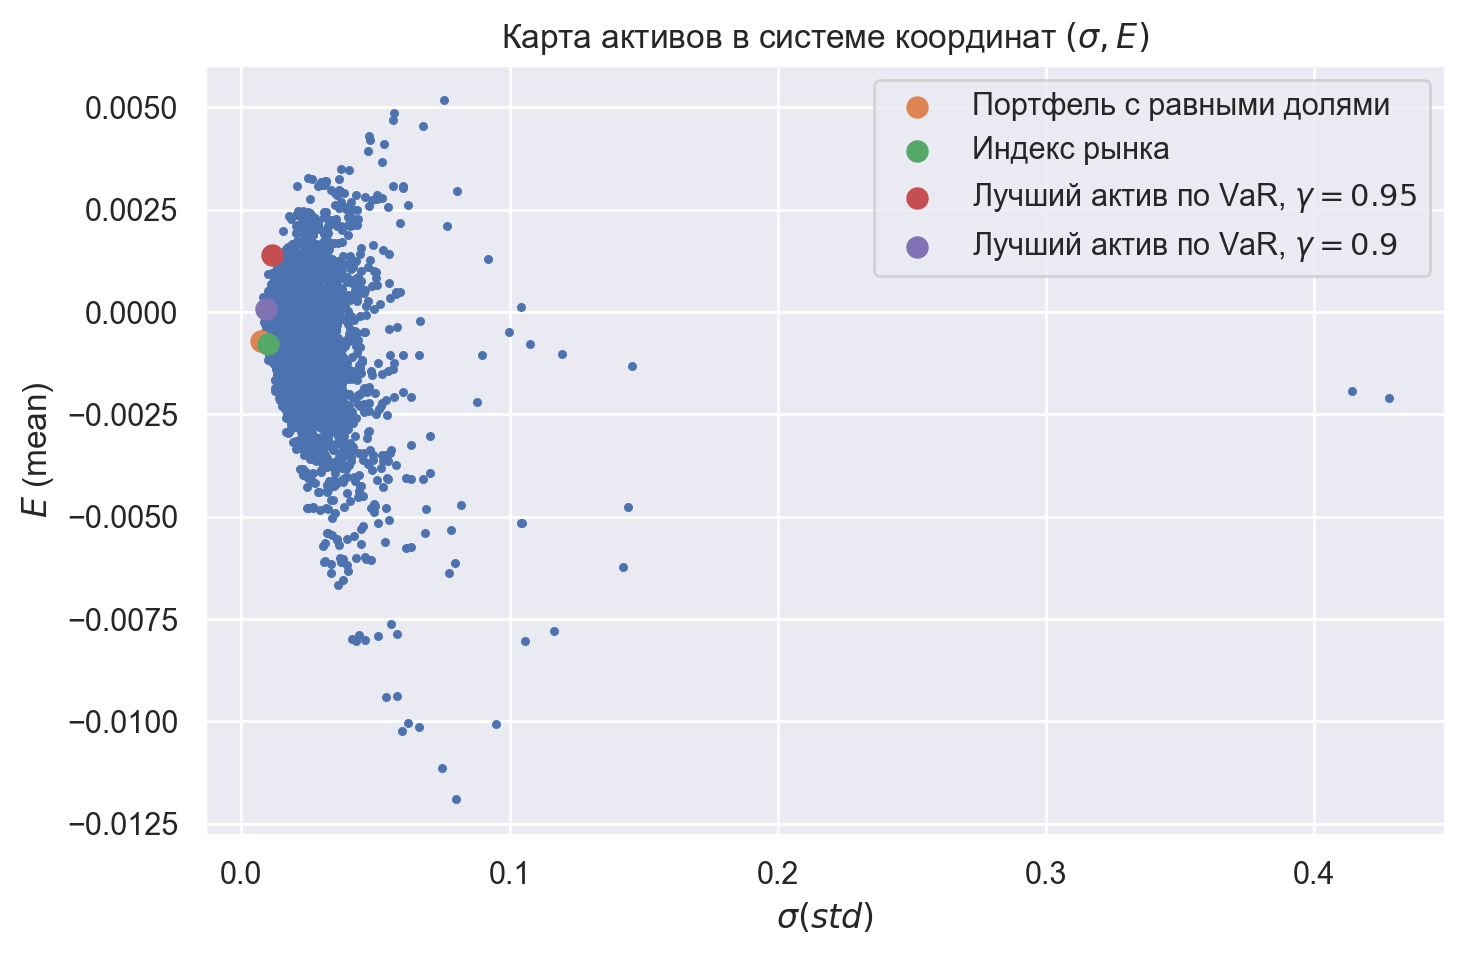

In [21]:
plt.scatter(returns.std(), returns.mean(), s=5)
plt.scatter([np.std(equal_weights)], [np.mean(equal_weights)], s=50, label='Портфель с равными долями')
plt.scatter([np.std(indexes_returns)], [np.mean(indexes_returns)], s=50, label='Индекс рынка')
plt.scatter([np.std(returns['EFC1.DU'])], [np.mean(returns['EFC1.DU'])], s=50, label='Лучший актив по VaR, $\gamma=0.95$')
plt.scatter([np.std(returns['0FM.BE'])], [np.mean(returns['0FM.BE'])], s=50, label='Лучший актив по VaR, $\gamma=0.9$')

plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание № 6

## Критерий инверсии

In [59]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [51]:
stocks = ['ADS.DE', 'ALV.DE', 'BAYN.DE', 'BAS.DE', 'BMW.DE', 'CON.DE',
       'COP.DE', 'DB1.DE', 'DBK.DU', 'DTE.DE', 'HEN3.DE', 'MUV2.DE',
       'EOAN.DE', 'RWE.SG', 'SAP.DE', 'SIE.MU', 'TLX.HA', 'TUI1.DE']

(250, 18)

In [61]:
def inversion_criterion(sample, events, alpha):
    inversion = 0

    for i in range(events - 1):
        for j in range(i + 1, events):
            if sample[i] > sample[j]:
                inversion += 1

    Et = events * (events - 1) / 4
    Dt = events * (events - 1) * (2 * events + 5) / 72

    T_norm = np.abs((inversion - Et) / np.sqrt(Dt))
    C = norm.ppf(1 - alpha/2)

    if T_norm < C:
        return 'Гипотеза не отвергается'

    return 'Гипотеза отвергается'

'Гипотеза не отвергается'

In [62]:
crit_table = pd.DataFrame()
alpha = 0.05

for stock in stocks:
    res = inversion_criterion(returns[stock], returns[stock].shape[0], alpha)
    crit_table.loc[stock, 'Критерий инверсии'] = res
    
crit_table

,Критерий инверсии
ADS.DE,Гипотеза не отвергается
ALV.DE,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается


## Критерий независимости

In [81]:
from scipy.stats import kendalltau

In [119]:
def ind_test(sample, k, alpha):
    sample_k1 = sample[:250-k]
    sample_k2 = sample[k-250:]
    
    p_value = kendalltau(sample_k1, sample_k2).pvalue
    
    if p_value > alpha:
        return 'Гипотеза не отвергается'

    return 'Гипотеза отвергается'

In [120]:
ind_table = pd.DataFrame(index=stocks, columns=range(1, 11))
res_k = []

for stock in stocks:
    res_k = []
    for k in range(1, 11):
        res_k.append(ind_test(returns[stock], k, alpha))
        
    ind_table.loc[stock,] = res_k
    
ind_table

,1,2,3,4,5,6,7,8,9,10
ADS.DE,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается


In [135]:
(ind_table == 'Гипотеза не отвергается').sum(axis=1)

ADS.DE      8
ALV.DE     10
BAYN.DE     9
BAS.DE     10
BMW.DE     10
CON.DE      9
COP.DE      9
DB1.DE      8
DBK.DU     10
DTE.DE      9
HEN3.DE    10
MUV2.DE    10
EOAN.DE    10
RWE.SG     10
SAP.DE     10
SIE.MU     10
TLX.HA      9
TUI1.DE     8
dtype: int64

In [137]:
k = 5

for stock in stocks:
    res = ind_test(returns[stock], k, alpha)
    crit_table.loc[stock, 'Критерий независимости'] = res
    
crit_table

,Критерий инверсии,Критерий независимости
ADS.DE,Гипотеза не отвергается,Гипотеза не отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается


## Критерий автокорреляции

### Критерий Льюнга-Бокса

Минус, придется долго описывать че за модель

http://www.machinelearning.ru/wiki/index.php?title=Критерий_Льюнга-Бокса

https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting

https://www.codecamp.ru/blog/ljung-box-test-python/

In [159]:
import warnings
warnings.filterwarnings("ignore")

In [160]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

In [172]:
def ljungbox(sample, k, alpha):
    
    model = ARIMA(sample, order=(1,1,2))
    model_fit = model.fit()
    
    p_value = acorr_ljungbox(model_fit.resid, 
                             lags=[k]).lb_pvalue.values[0]
    
    if p_value > alpha:
        return 'Гипотеза не отвергается'

    return 'Гипотеза отвергается'

In [174]:
k = 10

for stock in stocks:
    res = ljungbox(returns[stock], k, alpha)
    crit_table.loc[stock, 'Критерий Льюнга-Бокса'] = res
    
crit_table

,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса,Критерий Дарбина-Уотсона
ADS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается


### Критерий Дарбина-Уотсона

https://wiki.loginom.ru/articles/durbin-watson-statistic.html

https://real-statistics.com/statistics-tables/durbin-watson-table/

In [230]:
def durbin_watson(state, interval):
    numerator = 0
    denominator = 0
    
    model = sm.OLS(state.tolist(), list(range(250)))
    results = model.fit()
    
    state = state - results.predict()
    
    for ind in range(state.shape[0]):
        if ind > 0:
            numerator += np.power(state[ind] - state[ind - 1], 2)
            
        denominator += np.power(state[ind], 2)
        
    stat = numerator / denominator
    
    if interval[0] <= stat <= interval[1]:
        return 'Гипотеза не отвергается', stat

    return 'Гипотеза отвергается', stat

In [231]:
interval = (1, 2)
durbin_watson(test, interval)

('Гипотеза отвергается', 2.1927313745289494)

In [232]:
for stock in stocks:
    res = durbin_watson(returns[stock], interval)
    crit_table.loc[stock, 'Критерий Дарбина-Уотсона'] = res[0]
    
crit_table

,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса,Критерий Дарбина-Уотсона
ADS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
